# Задача

В сборном проекте необходимо выявить определяющие успешность игры закономерности. Имеются данные по играм до 2016 года. Посмотреть есть-ли разница в данных за разные периоды времени, выявить примерный срок жизни игровой платформы и определить актуальный период, то есть период наблюдения за потенциально прибыльными платформами в настоящее время. Выбрать актуальные платформы и изучить влияние оценок критиков и оценок пользователей игр на количество  продаж. Выделить жанры с высокими и низкими продажами. Составить портрет пользователя каждого региона: популярные платформы в регионе; популярные жанры в регионе; влияние возрастного рейтинга на продажи в регионе. Проверить гипотезу о равенстве средних оценок пользователей по двум популярным платформам и гипотезу о равенстве средних оценок рейтинга по двум популярным жанрам.

## Признаки:  
 - Name — название игры  
 - Platform — платформа  
 - Year_of_Release — год выпуска  
 - Genre — жанр игры  
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)  
 - EU_sales — продажи в Европе (миллионы проданных копий)  
 - JP_sales — продажи в Японии (миллионы проданных копий)  
 - Other_sales — продажи в других странах (миллионы проданных копий)  
 - Critic_Score — оценка критиков (максимум 100)  
 - User_Score — оценка пользователей (максимум 10)  
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации

In [1]:
import pandas as pd
df = pd.read_csv('games.csv')

In [4]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
len(df['Name'].unique())

11560

In [7]:
df[df['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df[df['Name'] == 'AC/DC LIVE: Rock Band Track Pack']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6402,AC/DC LIVE: Rock Band Track Pack,Wii,2008.0,Misc,0.24,0.00,0.0,0.02,NaN,7.2,T
6834,AC/DC LIVE: Rock Band Track Pack,PS3,2008.0,Misc,0.21,0.01,0.0,0.02,60.0,5.3,T
7099,AC/DC LIVE: Rock Band Track Pack,X360,2008.0,Misc,0.21,0.00,0.0,0.02,63.0,4.9,T
8688,AC/DC LIVE: Rock Band Track Pack,PS2,2008.0,Misc,0.08,0.06,0.0,0.02,NaN,tbd,T


In [9]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Данные очень информативны, хоть у немалой части из них и есть пропуски. Некоторые данные по играм отсутствуют на одних игровых платформах, но присутствуют по этим же играм на других. Немалую часть игр по которым отсутствует много информации придется выкинуть, но это не кажется таким страшным потому как в основном они достаточно старые и были актуальны в то время когда игровая индустрия была совсем другой и присутствие их в нашей таблице даже нежелательно.

## Подготовка данных

Большинство пропусков из-за отсутствия данных о достаточно старых играх, так же некоторые непопулярные современные игры не были оценены. Информация, которую считают маловажной и редко на нее обращают внимание такая как возрастной рейтинг, часто имеет пропуски. И в редких случаях отсутствуют оценки по современным популярным играм.

### Приведение названия столбцов к нижнему регистру

In [16]:
columns = []
for name in df:
    columns.append(name.lower())
df.set_axis(columns, axis='columns', inplace=True)

### Преобразуем данные в нужные типы

Рейтинг пользователей имеет тип object и присутствуют в столбце значения 'tbd' это означает что данные по игре были сохранены когда оценки пользователей были еще неизвестны, заменим на 'nan' эти значеня.

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Заполним пропуски подглядев соответствующие значения у повторяющихся игр.

In [19]:
duplic = list(df[df['name'].duplicated()]['name'].unique())    #список названий игр, которые повторяются

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим устаревшую абривиатуру 'K-A' на новую 'E' и 'RP' на NaN потому что она означает, что продукт ожидает присвоения рейтинга.

In [21]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [22]:
df['rating'] = df['rating'].replace('RP', df.loc[14244, 'name']) 

In [23]:
ratings = ['E', 'M', 'T', 'E10+', 'AO', 'EC']    #список тех возрастных рейтингов которые актуальны на данный момент

In [24]:
def repl(row, column):    #функция замены неизвестного в дубликате в том случае если существуют данные в другом дубликате
    if (row['name'] in duplic) and (row[column] != row[column]):
        if column == 'rating':
            if len(df.loc[df['name'] == row['name']].query('rating in @ratings')) != 0:    
                return df.loc[df['name'] == row['name']].query('rating in @ratings')['rating'].min()
            else:
                return row[column]
        else:
            return df.loc[df['name'] == row['name'], column].max()    #это функция возвращает максимальное значение из среза
    else:
        return row[column]

In [25]:
df['year_of_release'] = df.apply(repl, axis=1, column = 'year_of_release')

In [26]:
df['critic_score'] = df.apply(repl, axis=1, column = 'critic_score')

In [27]:
df['user_score'] = df.apply(repl, axis=1, column = 'user_score')

In [28]:
df['rating'] = df.apply(repl, axis=1, column = 'rating')

In [29]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [30]:
df.query('critic_score.notnull() and user_score.notnull()').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.037030,0.027023,-0.063570,0.036309,0.006297,-0.245990
na_sales,-0.037030,1.000000,0.835252,0.458486,0.720861,0.225355,0.082808
eu_sales,0.027023,0.835252,1.000000,0.502979,0.713615,0.208210,0.051026
jp_sales,-0.063570,0.458486,0.502979,1.000000,0.381006,0.145828,0.126704
other_sales,0.036309,0.720861,0.713615,0.381006,1.000000,0.187919,0.052609
critic_score,0.006297,0.225355,0.208210,0.145828,0.187919,1.000000,0.531611
user_score,-0.245990,0.082808,0.051026,0.126704,0.052609,0.531611,1.000000


В значениях с неизвестной оценкой критиков и известной оценкой зрителей можно увидеть средний уровень корреляции 0,531611, что бы заполнить оценку критиков можно оценку пользователей умножить на 10, и с неизвестной оценкой пользователей проделать обратную операцию.

In [31]:
df.loc[(df['critic_score'].isnull()) & (df['user_score'].notnull()), 'critic_score'] = df.query('critic_score.isnull() and user_score.notnull()')['user_score']*10

In [32]:
df.loc[(df['critic_score'].notnull()) & (df['user_score'].isnull()), 'user_score'] = df.query('critic_score.notnull() and user_score.isnull()')['critic_score']/10

<AxesSubplot:>

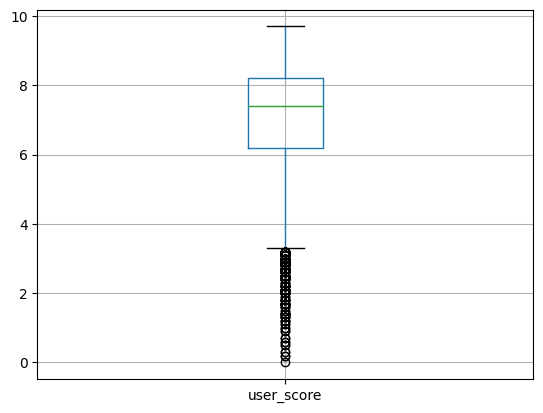

In [33]:
import matplotlib.pyplot as plt
df.boxplot('user_score')

<AxesSubplot:>

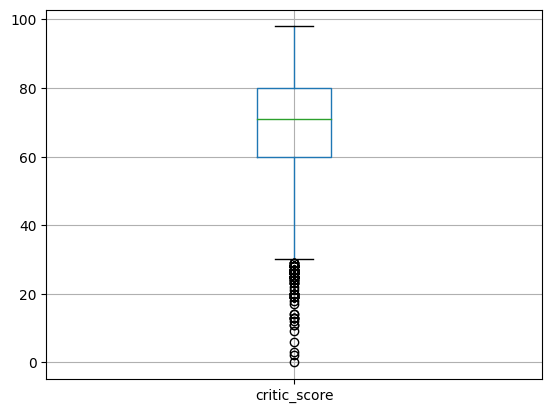

In [34]:
df.boxplot('critic_score')

Предполагаю, что некоторые пропуски в столбце год можно заполнить для некоторых данных жанра спорт, т.к. в названиях таких игр часто указывают год сезона который симулируется в игре, а саму игру выпускают на год раньше.

In [35]:
df.loc[((df['year_of_release'].isnull()) & (df['genre'] == 'Sports'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
3883,Fishing Derby,2600,NaN,Sports,0.48,0.03,0.00,0.01,NaN,NaN,NaN
4635,NHL Slapshot,Wii,NaN,Sports,0.39,0.00,0.00,0.02,76.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,6.0,E
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
7108,Big Beach Sports 2,Wii,NaN,Sports,0.09,0.11,0.00,0.02,NaN,NaN,E
7387,Move Fitness,PS3,NaN,Sports,0.00,0.16,0.00,0.05,NaN,NaN,NaN
7605,Famista 64,N64,NaN,Sports,0.00,0.00,0.17,0.03,NaN,NaN,NaN
8067,Backbreaker,X360,NaN,Sports,0.17,0.00,0.00,0.01,54.0,7.6,E
8260,Backbreaker,PS3,NaN,Sports,0.16,0.00,0.00,0.01,58.0,7.0,E


In [36]:
df.loc[1301, 'year_of_release'] = 1998

In [37]:
df.loc[4775, 'year_of_release'] = 2002

In [38]:
df.loc[5655, 'year_of_release'] = 2004

In [39]:
df.loc[8918, 'year_of_release'] = 2004

In [40]:
df.loc[16079, 'year_of_release'] = 2006

Есть еще корректные данные по двум играм у которых не хватает только года выпуска

In [41]:
df.loc[8067, 'year_of_release'] = 2010

In [42]:
df.loc[8260, 'year_of_release'] = 2010

In [43]:
df.loc[4635, 'year_of_release'] = 2010

Удалим 2 совсем безнадежные строки в которых отсутствует вся информация кроме жанра и те строки в которых не указан год выхода игры

In [44]:
df.dropna(subset = ['name'], inplace = True)

In [45]:
df[df['year_of_release'].isnull()].groupby('genre').count()

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
genre,,,,,,,,,,
Action,27,27,0,27,27,27,27,12,12,12
Adventure,9,9,0,9,9,9,9,3,3,5
Fighting,7,7,0,7,7,7,7,1,1,2
Misc,15,15,0,15,15,15,15,7,7,11
Platform,9,9,0,9,9,9,9,6,6,7
Puzzle,7,7,0,7,7,7,7,1,1,2
Racing,13,13,0,13,13,13,13,7,7,7
Role-Playing,14,14,0,14,14,14,14,5,5,6
Shooter,12,12,0,12,12,12,12,9,9,10


Никакой явной зависимости отсутствия года выпуска игры от жанра нету, скорее всего отсутствуют данные.

In [46]:
df.dropna(subset = ['year_of_release'], inplace = True)

In [47]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [48]:
df.query('critic_score == 0 and user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,0.0,0.0,E


Значит значения которые не определены заменим на -1, а неопределенные значения в рейтинге на N

In [49]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [50]:
df['user_score'] = df['user_score'].fillna(-1)

In [51]:
df['rating'] = df['rating'].fillna('N')

In [52]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ данных

<AxesSubplot:title={'center':'Все выпускаемые игры по годам и игры без оценки'}, ylabel='Frequency'>

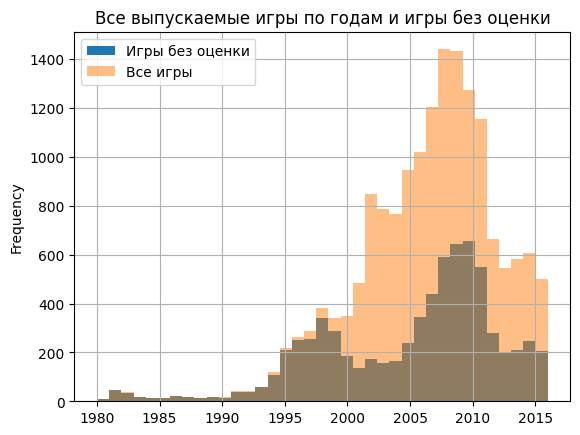

In [53]:
ax = df.query('user_score < 0 or critic_score < 0').plot(kind='hist', y='year_of_release', linewidth=5, bins=37, alpha=1, label='Игры без оценки')
df.plot(bins=37, y='year_of_release', kind='hist', ax=ax, grid=True, label='Все игры', alpha=0.5, title='Все выпускаемые игры по годам и игры без оценки')

Сразу заметно что до 1999 года данные по оценкам практически отсутствуют, с 2001 гистограмыы становятся симметричными.

In [54]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1247.88
X360     966.80
PS3      935.36
Wii      903.72
DS       804.28
PS       729.04
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.84
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

<AxesSubplot:title={'center':'Общее количество продаж по платформам'}, xlabel='platform'>

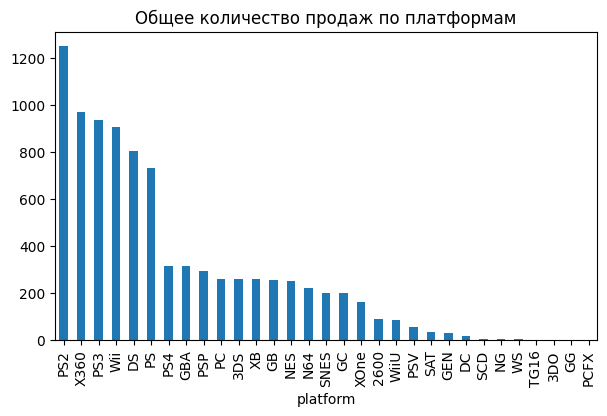

In [55]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(7, 4), title='Общее количество продаж по платформам')

Будем считать платформы значимыми с порядком продаж не меньше сотни.

In [56]:
top_platforms = ['PS2','X360','PS3','Wii','DS','PS','PS4','GBA','PSP','PC','3DS','XB','GB','NES','N64','SNES','GC','XOne']

In [57]:
years_platform = df.pivot_table(columns='platform', index='year_of_release', values='all_sales', aggfunc=['sum'])
for i in years_platform:    #удалим столбцы не входящие в наш список платформ
    if (i[1] not in top_platforms) and (i[0] != 'year_of_release'):
        years_platform.drop(columns=[i], inplace=True)
years_platform

sum                                                    \
platform           3DS      DS     GB    GBA     GC    N64    NES     PC   
year_of_release                                                            
1980               NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1981               NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1982               NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1983               NaN     NaN    NaN    NaN    NaN    NaN  10.96    NaN   
1984               NaN     NaN    NaN    NaN    NaN    NaN  50.08    NaN   
1985               NaN    0.02    NaN    NaN    NaN    NaN  53.44   0.04   
1986               NaN     NaN    NaN    NaN    NaN    NaN  36.41    NaN   
1987               NaN     NaN    NaN    NaN    NaN    NaN  19.76    NaN   
1988               NaN     NaN   1.43    NaN    NaN    NaN  45.01   0.03   
1989               NaN     NaN  64.97    NaN    NaN    NaN   7.85    NaN   
1990               NaN     NaN   4.89    NaN    NaN    NaN  15.73    NaN   
1991               NaN     NaN   5.57    NaN    NaN    NaN   6.11    NaN   
1992               NaN     NaN  25.49    NaN    NaN    NaN   1.98   3.03   
1993               NaN     NaN    NaN    NaN    NaN    NaN   3.61    NaN   
1994               NaN     NaN  12.18    NaN    NaN    NaN   0.11  12.87   
1995               NaN     NaN   3.60    NaN    NaN    NaN    NaN   4.22   
1996               NaN     NaN  36.03    NaN    NaN  34.10    NaN  10.58   
1997               NaN     NaN   6.37    NaN    NaN  39.50    NaN  11.27   
1998               NaN     NaN  26.90    NaN    NaN  49.24    NaN   3.26   
1999               NaN     NaN  38.00    NaN    NaN  58.01    NaN   4.74   
2000               NaN     NaN  19.76   0.07    NaN  33.97    NaN   4.66   
2001               NaN     NaN   9.24  61.53  26.62   3.25    NaN   5.47   
2002               NaN     NaN    NaN  74.16  52.22   0.08    NaN   8.57   
2003               NaN     NaN    NaN  56.67  51.20    NaN    NaN   8.89   
2004               NaN   17.27    NaN  77.91  28.89   0.33    NaN  10.39   
2005               NaN  130.14    NaN  34.53  27.91    NaN    NaN   4.38   
2006               NaN  119.81    NaN   5.46  11.55    NaN    NaN   2.85   
2007               NaN  147.23    NaN   3.40   0.27    NaN    NaN   9.28   
2008               NaN  145.36    NaN    NaN    NaN    NaN    NaN  12.46   
2009               NaN  119.56    NaN    NaN    NaN    NaN    NaN  17.05   
2010              0.32   85.35    NaN    NaN    NaN    NaN    NaN  26.15   
2011             63.20   26.33    NaN    NaN    NaN    NaN    NaN  35.16   
2012             51.76   11.67    NaN    NaN    NaN    NaN    NaN  23.45   
2013             56.57    1.54    NaN    NaN    NaN    NaN    NaN  12.66   
2014             43.76     NaN    NaN    NaN    NaN    NaN    NaN  13.63   
2015             27.78     NaN    NaN    NaN    NaN    NaN    NaN   8.52   
2016             15.14     NaN    NaN    NaN    NaN    NaN    NaN   5.25   

                                                                               \
platform             PS     PS2     PS3     PS4    PSP   SNES     Wii    X360   
year_of_release                                                                 
1980                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1981                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1982                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1983                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1984                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1985                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1986                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1987                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1988                NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
1989  

In [58]:
new_column = ['3DS','DS','GB','GBA','GC','N64','NES','PC','PS','PS2','PS3','PS4','PSP','SNES','Wii','X360','XB','XOne']

In [59]:
years_platform.columns = new_column    #переименуем колонки мультииндекса в обычные

<AxesSubplot:title={'center':'Продажи игр на различные платформы по годам'}, xlabel='year_of_release'>

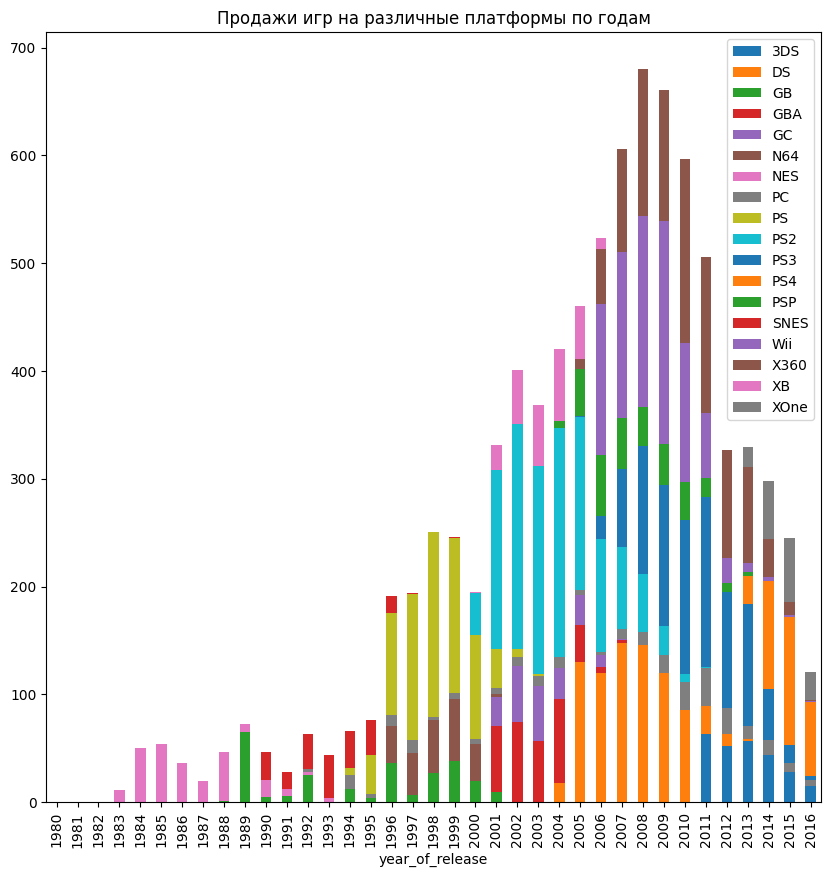

In [61]:
years_platform.plot.bar(stacked=True, title='Продажи игр на различные платформы по годам', figsize=(10,10))    

Разобьем нашу таблицу на две по 9 столбцов в каждой.

In [62]:
years_platform_1 = years_platform.loc[:, '3DS': 'PS']
years_platform_2 = years_platform.loc[:,'PS2': 'XOne' ]

<AxesSubplot:title={'center':'Продажи игр на платформы(3DS,DS,GB,GBA,GC,N64,NES,PC,PS) по годам'}, xlabel='year_of_release'>

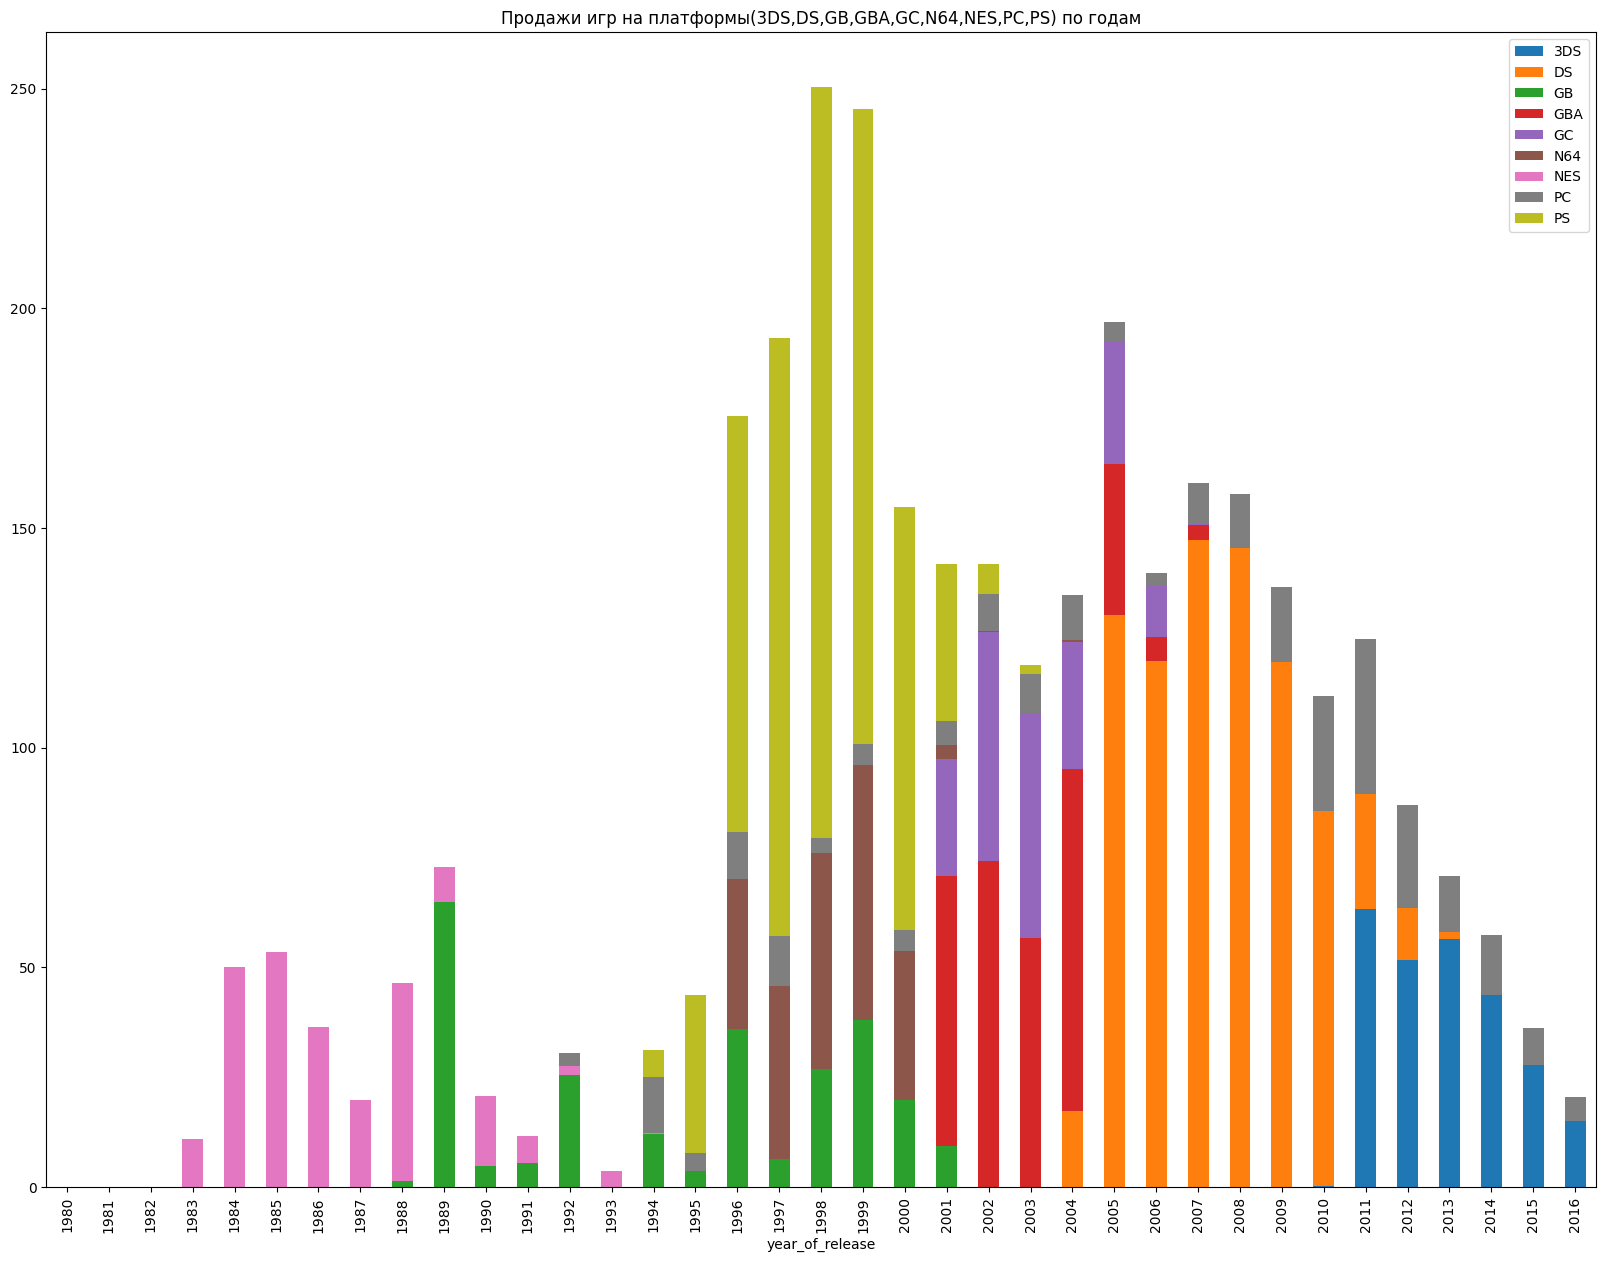

In [65]:
years_platform_1.plot.bar(figsize=(20,15), stacked=True, title='Продажи игр на платформы(3DS,DS,GB,GBA,GC,N64,NES,PC,PS) по годам')

<AxesSubplot:title={'center':'Продажи игр на платформы(PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne) по годам'}, xlabel='year_of_release'>

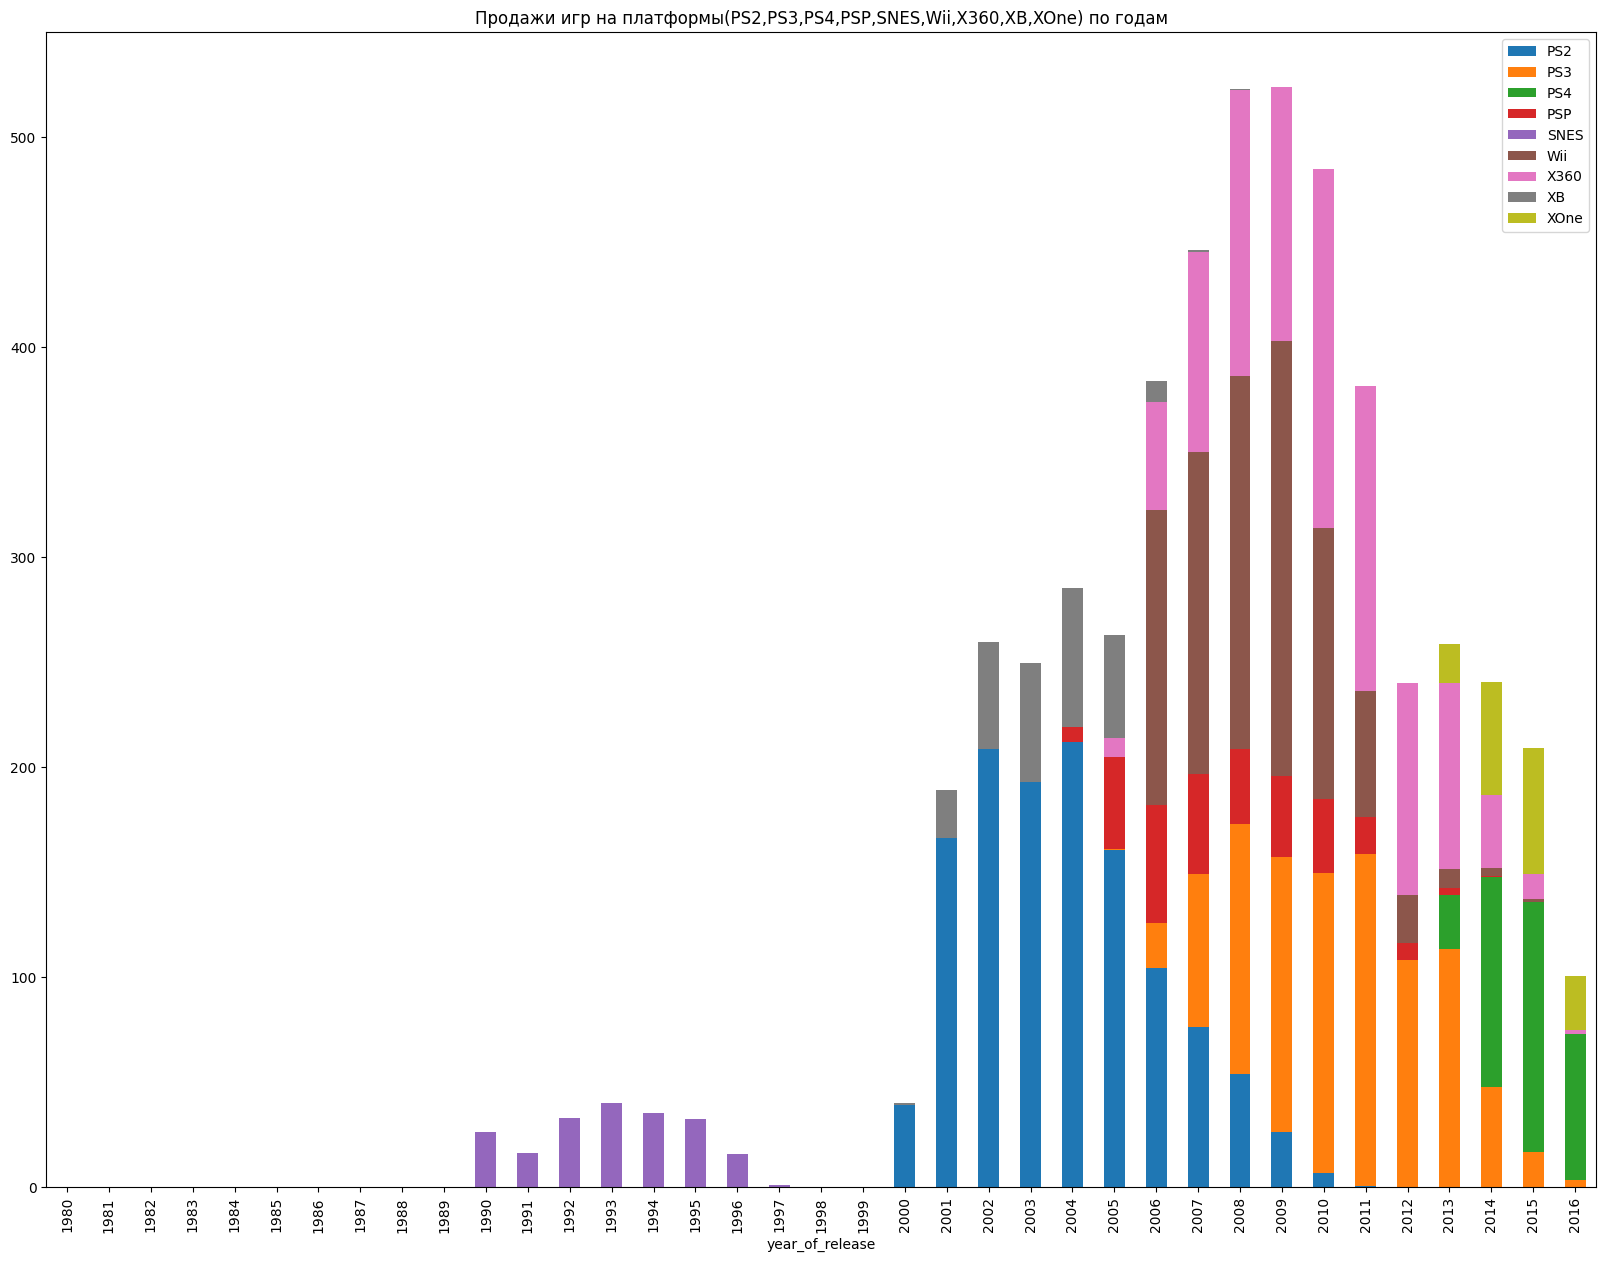

In [66]:
years_platform_2.plot.bar(figsize=(20,15), stacked=True, title='Продажи игр на платформы(PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne) по годам')

In [67]:
years = 0
k = 0
for name in years_platform:
    k = k + 1
    years = years + len(years_platform.loc[years_platform[name] > 0])
years/k

10.444444444444445

Видно, что активные продажи игр на платформу составляют в большинстве случаев 5-6 лет, а продолжительность продаж игр на платформу до 11 лет.

Актуальный период возьмем с 2011 года что бы увидеть тенеденцию роста или падения продаж игр на платформу, раньше не имеет смысла т.к. те платформы уже к 2016 году ближе к своему закату.  

In [68]:
df_actual = df.query('year_of_release > 2010')

In [69]:
df_actual.groupby('platform')['all_sales'].sum()

platform
3DS     258.21
DS       39.54
PC       98.67
PS2       0.45
PS3     447.69
PS4     314.14
PSP      29.51
PSV      53.81
Wii      96.39
WiiU     82.19
X360    382.75
XOne    159.32
Name: all_sales, dtype: float64

In [70]:
years_actual = df_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')

In [71]:
years_actual.set_axis(['3DS','DS','PC','PS2','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne'], axis='columns', inplace=True)

In [72]:
years_actual_1 = years_actual.loc[:, '3DS': 'PS4']

In [73]:
years_actual_2 = years_actual.loc[:, 'PSP': 'XOne']

<AxesSubplot:title={'center':'Продажи игр на платформы(3DS,DS,PC,PS2,PS3,PS4) в актуальный период'}, xlabel='year_of_release'>

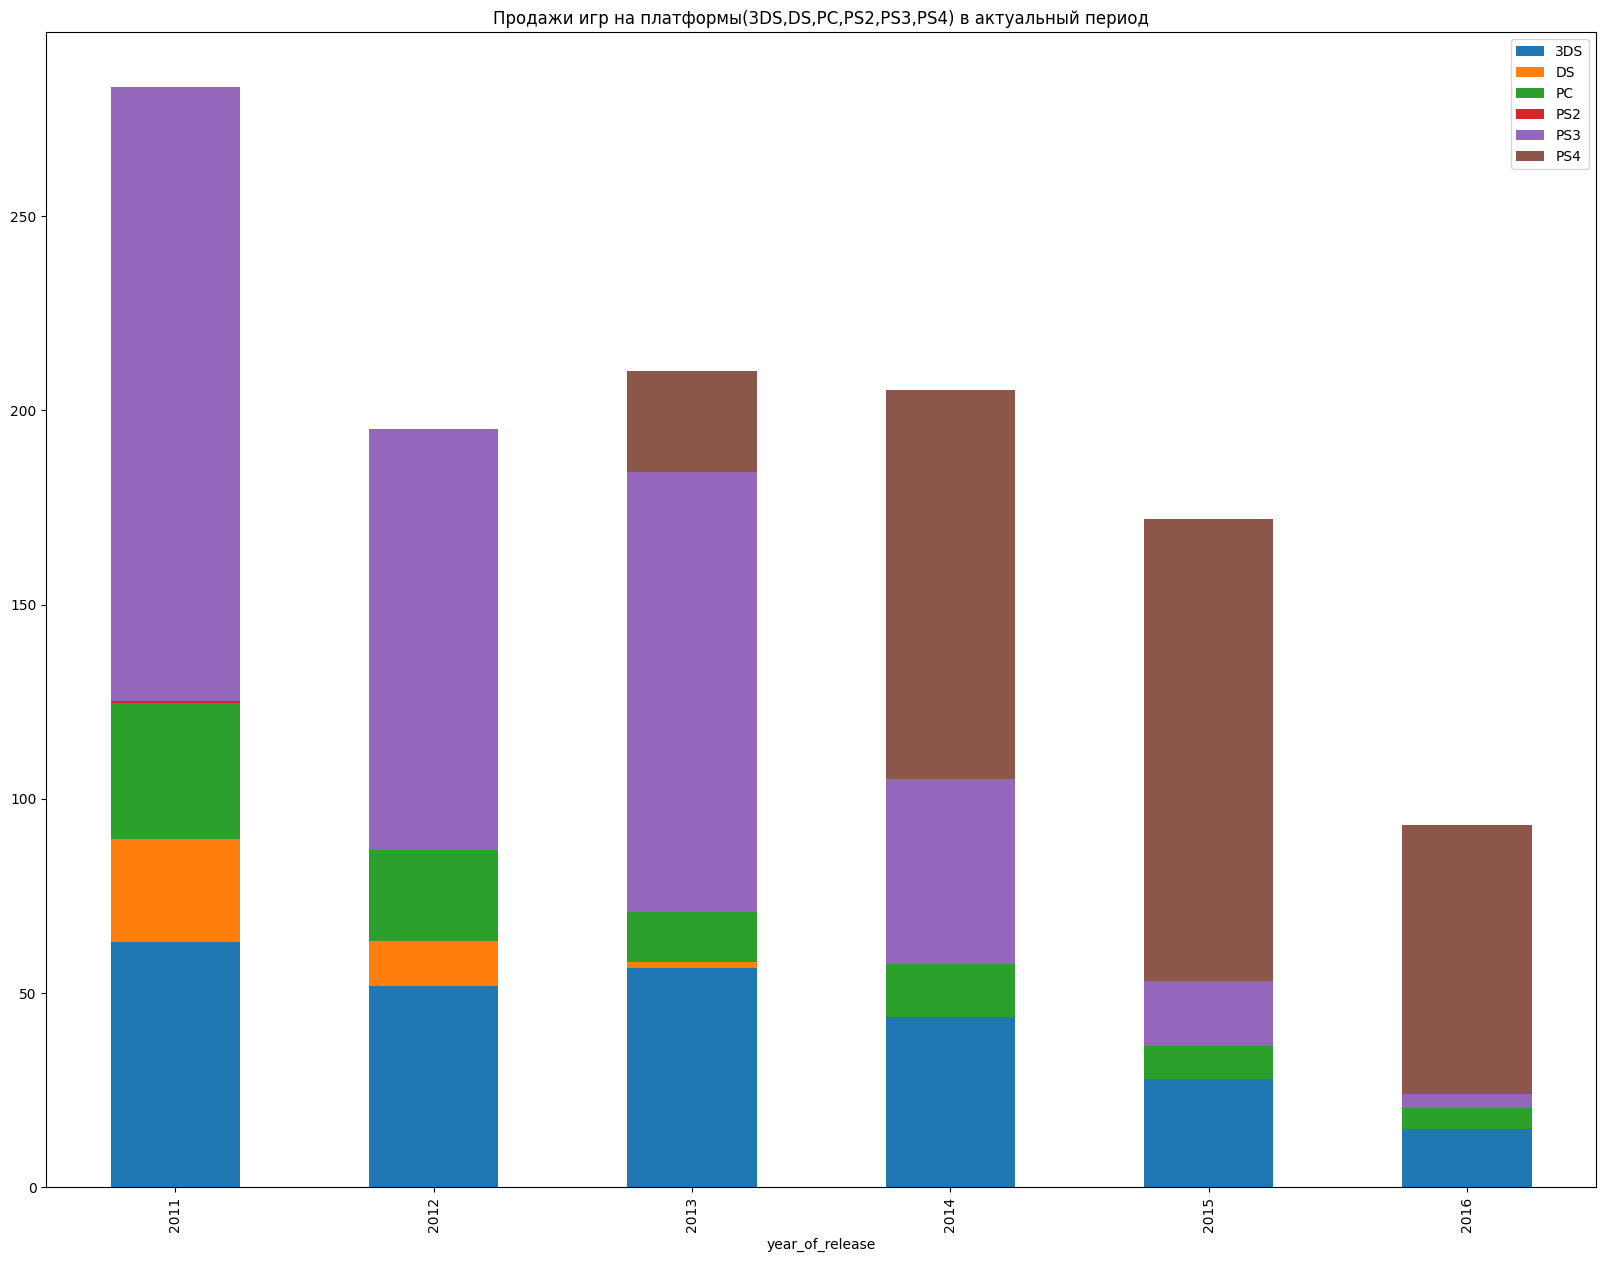

In [76]:
years_actual_1.plot.bar(figsize=(20,15), stacked=True, title='Продажи игр на платформы(3DS,DS,PC,PS2,PS3,PS4) в актуальный период')

На этих столбцах видно, что продажи на DS перестали и к 2016 идут к закату на 3DS но в еще будут, правда не выше 25млн. и PS2 можно уже вообще не брать в расчет. Видно, что платформа PS4 заменяет PS3 и не будем сбрасывать со счетов PC как отмечалось ранее продажи на эту платформу могут неожиданно вырасти, тем более в годы смены одной популярной платформы на другую.

<AxesSubplot:title={'center':'Продажи игр на платформы(PSP,PSV,Wii,WiiU,X360,XOne) в актуальный период'}, xlabel='year_of_release'>

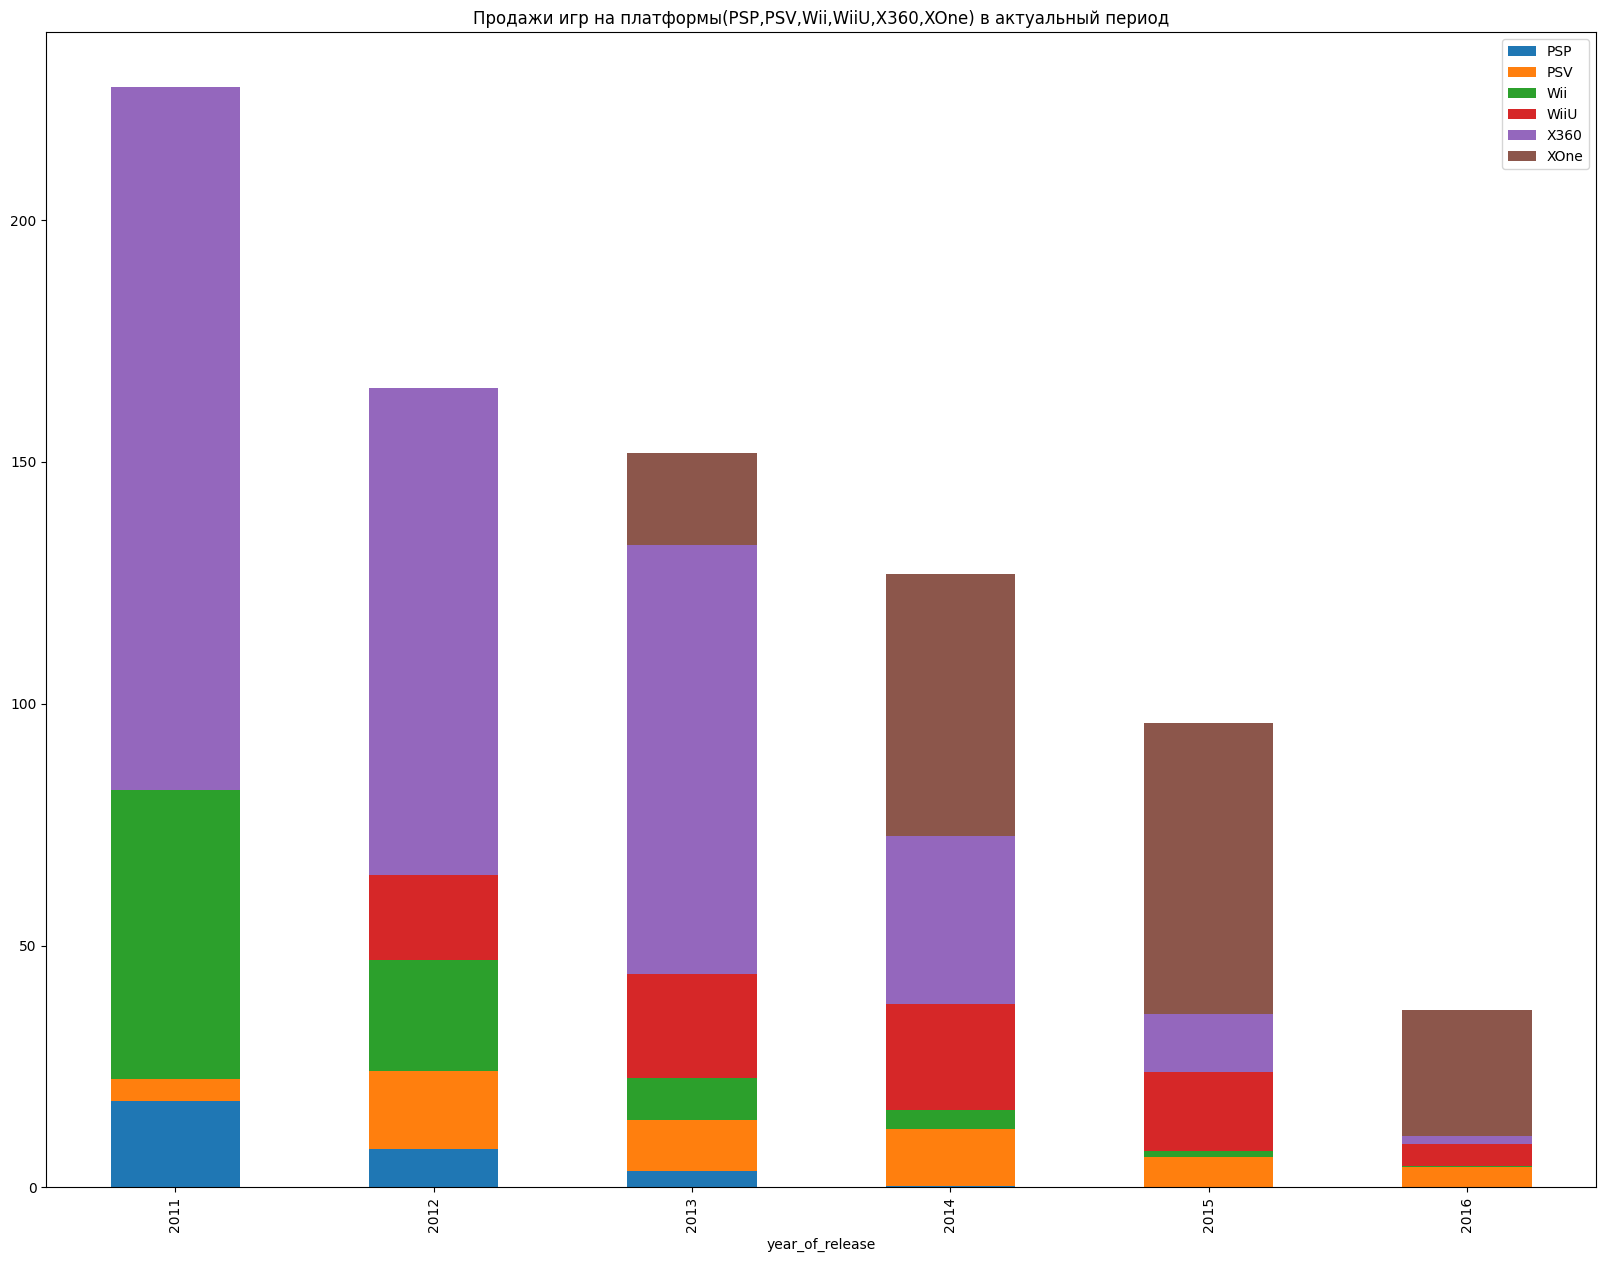

In [77]:
years_actual_2.plot.bar(figsize=(20,15), stacked=True, title='Продажи игр на платформы(PSP,PSV,Wii,WiiU,X360,XOne) в актуальный период')

В будущем не будем учитывать платформы X360, Wii, PSP и скорее всего подошли к закату WiiU и PSV  и недавно появилась XOne платформа.

По потенциалу на 2017 год выделим PS4, XOne и PC который может стать прибильной платформой в любой год. Скорректируем наш актуальный период на 2013 год появления игр на эти платформы.

In [78]:
df_actual_modern = df.query('(year_of_release > 2012) and (platform == "XOne" or platform == "PS4" or platform == "PC")')

In [79]:
modern_pivot = df_actual_modern.pivot_table(index='name', columns='platform', values='all_sales', aggfunc='sum')

<AxesSubplot:>

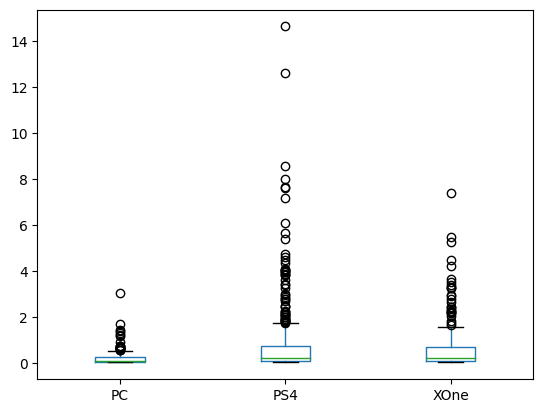

In [82]:
modern_pivot.plot.box()

In [83]:
df_actual_modern.groupby('platform').sum()['all_sales']

platform
PC       40.06
PS4     314.14
XOne    159.32
Name: all_sales, dtype: float64

По продажам лидирует PS4, XOne отстает в 2 раза и в 8 раз PC платформа. У PS4 достаточно много хитов, т.е. много игр за верхним пределом усов.

<AxesSubplot:>

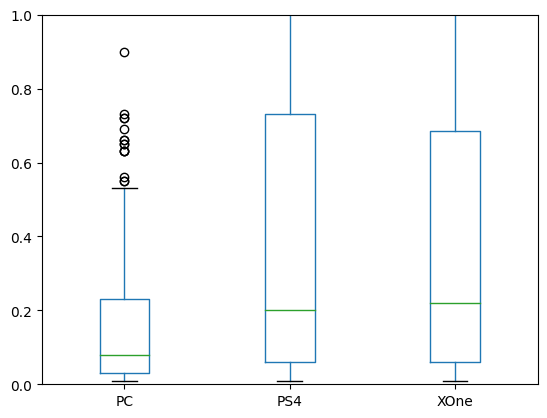

In [84]:
modern_pivot.plot.box(ylim=(0, 1))

Среднее количество продаж на XOne похоже немного больше чем на PS4

In [85]:
modern_pivot['PC'].describe()

count    192.000000
mean       0.208646
std        0.349801
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: PC, dtype: float64

In [86]:
modern_pivot['PS4'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: PS4, dtype: float64

In [87]:
modern_pivot['XOne'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: XOne, dtype: float64

Нужно сравнивать платформы XOne и PS4 потому что они прямые конкуренты друг другу, все таки платформа PC довольно таки специфичная и значительно отличается от специализированных игровых платформ. Я предполагаю, что средние примерно равны друг другу и это отличает их конкуренцию, но XOne немного больше скорее всего из-за того что она присутствует на рынке Северной Америки, а он сам по себе больше любого рынка другой части света.

### Влияние отзывов критиков и пользователей на продажи

In [92]:
XOne_critic = df.query('platform == "XOne" and critic_score > -1').loc[:, ['platform', 'critic_score', 'all_sales']]

In [93]:
XOne_user = df.query('platform == "XOne" and user_score > -1').loc[:, ['platform', 'user_score', 'all_sales']]

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж'}, xlabel='critic_score', ylabel='all_sales'>

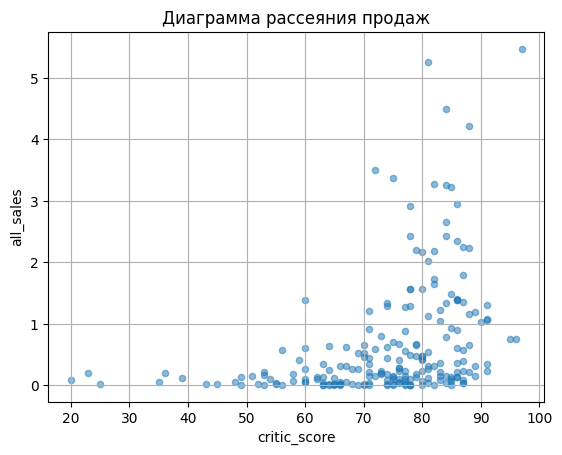

In [94]:
XOne_critic.plot(y='all_sales', x='critic_score', kind='scatter',grid=True, alpha=0.5, title='Диаграмма рассеяния продаж')

In [95]:
XOne_critic['all_sales'].corr(XOne_critic['critic_score'])

0.36167757494247443

Видна слабая корреляция.

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж'}, xlabel='user_score', ylabel='all_sales'>

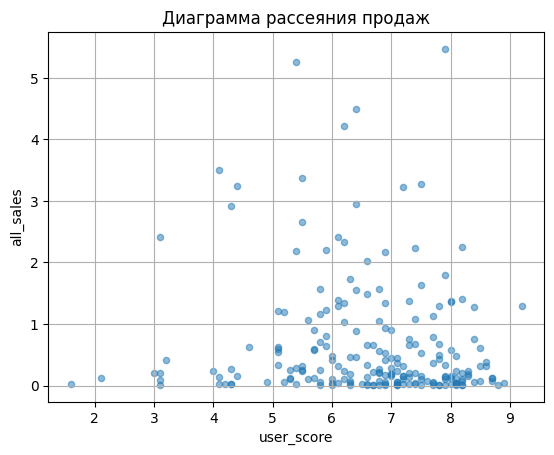

In [98]:
XOne_user.plot(y='all_sales', x='user_score', kind='scatter',grid=True, alpha=0.5, title='Диаграмма рассеяния продаж')

In [99]:
XOne_user['user_score'].corr(XOne_user['all_sales'])

-0.1019530718435239

Оценки пользователей намного отличаются от оценок критиков в худшую сторону прогнозирования. Возможно это обуславливается тем что сообщество пользователей которые ставят оценки менее профессионально подходят к этому делу и ответственности меньше чем у критиков, а больше присутствует эмоциональная составляющая. Да и не все люди ставят свои оценки, обычно этим занимается специфическая часть пользователей.

In [100]:
PC_critic = df.query('platform == "PC" and critic_score > -1').loc[:, ['platform', 'critic_score', 'all_sales']]

In [101]:
PC_user = df.query('platform == "PC" and user_score > -1').loc[:, ['platform', 'user_score', 'all_sales']]

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж'}, xlabel='critic_score', ylabel='all_sales'>

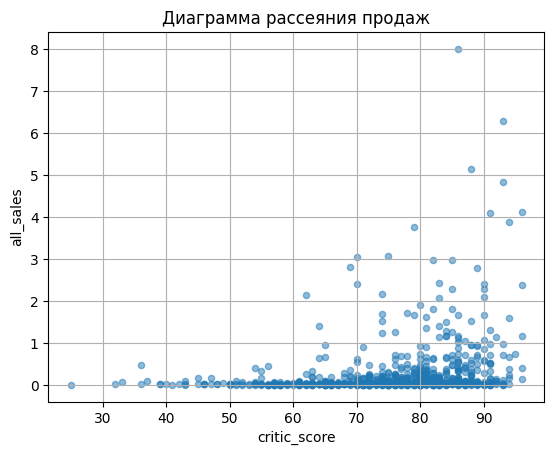

In [102]:
PC_critic.plot(y='all_sales', x='critic_score', kind='scatter',grid=True, alpha=0.5, title='Диаграмма рассеяния продаж')

In [103]:
PC_critic['all_sales'].corr(PC_critic['critic_score'])

0.2339323162552005

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж'}, xlabel='user_score', ylabel='all_sales'>

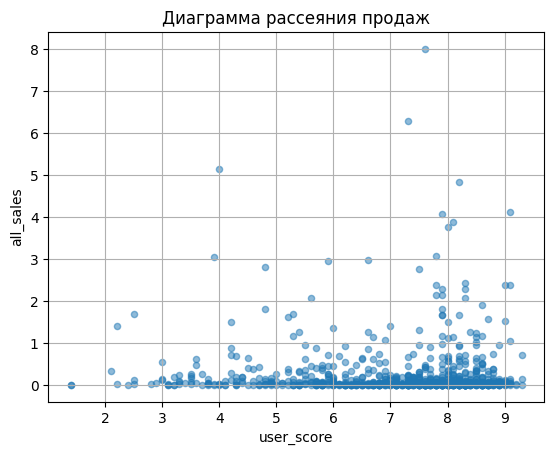

In [104]:
PC_user.plot(y='all_sales', x='user_score', kind='scatter',grid=True, alpha=0.5, title='Диаграмма рассеяния продаж')

In [105]:
PC_user['user_score'].corr(PC_user['all_sales'])

0.006370547395089212

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж'}, xlabel='critic_score', ylabel='all_sales'>

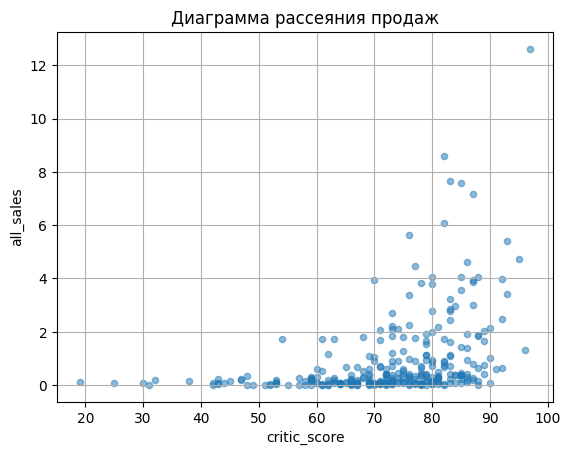

In [106]:
PS4_critic = df.query('platform == "PS4" and critic_score > -1').loc[:, ['platform', 'critic_score', 'all_sales']]
PS4_user = df.query('platform == "PS4" and user_score > -1').loc[:, ['platform', 'user_score', 'all_sales']]
PS4_critic.plot(y='all_sales', x='critic_score', kind='scatter',grid=True, alpha=0.5, title='Диаграмма рассеяния продаж')

In [107]:
PS4_critic['all_sales'].corr(PS4_critic['critic_score'])

0.3832374484958114

<AxesSubplot:title={'center':'Диаграмма рассеяния продаж'}, xlabel='user_score', ylabel='all_sales'>

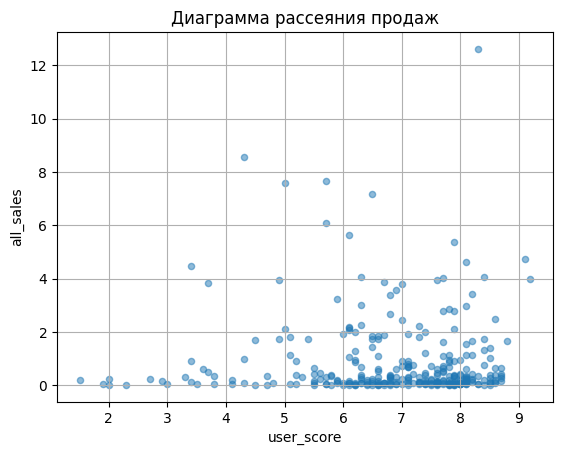

In [108]:
PS4_user.plot(y='all_sales', x='user_score', kind='scatter',grid=True, alpha=0.5, title='Диаграмма рассеяния продаж')

In [109]:
PS4_user['user_score'].corr(PS4_user['all_sales'])

-0.022672657905941234

Платформа PC незначительно отличается по этим показателям от XOne и PS4 и между собой они практически идентичны.

### Исследование жанров

In [116]:
genre_sales = df.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum'])

In [117]:
genre_sales['sales_per_game'] = genre_sales[genre_sales.columns[1]] / genre_sales[genre_sales.columns[0]]

In [118]:
genre_sales.sort_values(by='sales_per_game', ascending=False)

,count,sum,sales_per_game
,all_sales,all_sales,
genre,,,
Platform,879,826.03,0.939738
Shooter,1311,1050.02,0.800931
Role-Playing,1484,931.77,0.627877
Racing,1236,725.82,0.587233
Sports,2341,1329.81,0.568052
Fighting,842,443.59,0.526829
Action,3342,1735.63,0.519339
Misc,1735,794.41,0.457873


In [119]:
genre_sales_act = df.query('year_of_release > 2012').pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum'])

In [120]:
genre_sales_act['sales_per_game'] = genre_sales_act[genre_sales_act.columns[1]] / genre_sales_act[genre_sales_act.columns[0]]

In [121]:
genre_sales_act.sort_values(by='sales_per_game', ascending=False)

,count,sum,sales_per_game
,all_sales,all_sales,
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,769,322.50,0.419376
Misc,156,63.06,0.404231


Есть два лидирующих жанра. За актуальный период видно что верхня часть жанров оттянула количество продаж за счет другой половины.

In [122]:
genre_sales_all = df.pivot_table(index='year_of_release', columns='genre', values='all_sales', aggfunc='mean')

<AxesSubplot:title={'center':'Продажи игр различных жанров'}, xlabel='year_of_release'>

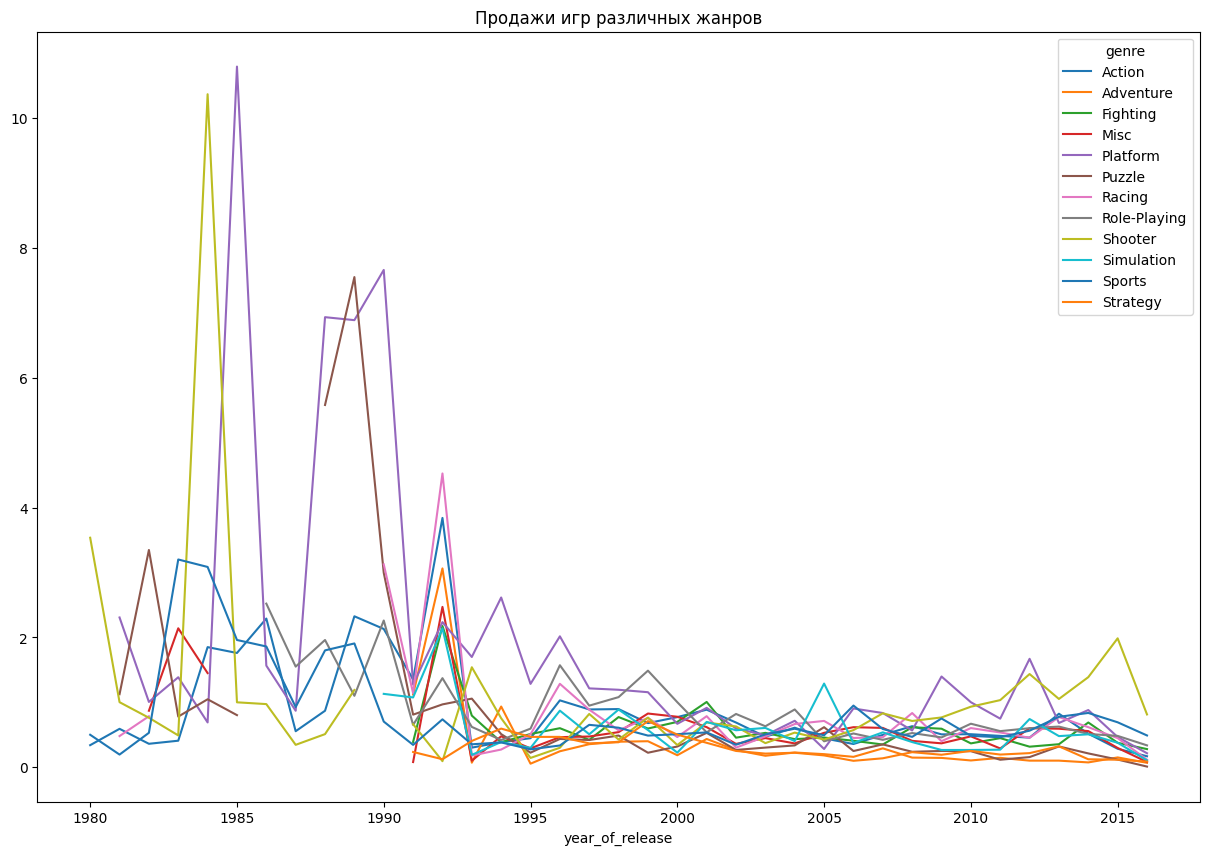

In [123]:
genre_sales_all.plot(figsize=(15,10), title='Продажи игр различных жанров', legend=True)

За последнее время выстрелил "шутер" и затем пошел на спад , рядом с ним более плавно жанр "спорт" и это два жанра, которые выделяются на общем фоне в данный момент, так же видно что у "симуляторов" и "платформеров" были свои всплески в прошлом, но второй достаточно быстро идет на спад, возможно это обусловлено тем что перестали появляться портативные игровые платформы.

## Составить портрет пользователя каждого региона

### Топ 5 платформ

In [124]:
top5_platform_na = df.query('na_sales > 0').groupby('platform').sum()['na_sales'].sort_values(ascending=False).head(5)
top5_platform_na

platform
X360    599.32
PS2     580.45
Wii     494.40
PS3     391.76
DS      381.38
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Продажи в Северной Америке'}, ylabel='na_sales'>

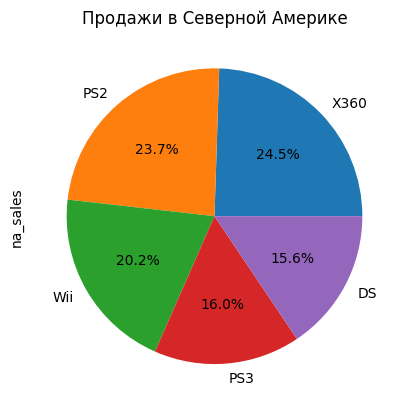

In [125]:
top5_platform_na.plot(kind='pie', title='Продажи в Северной Америке', autopct='%1.1f%%')

In [126]:
top5_platform_eu = df.query('eu_sales > 0').groupby('platform').sum()['eu_sales'].sort_values(ascending=False).head(5)
top5_platform_eu

platform
PS2     337.32
PS3     328.97
X360    269.80
Wii     261.48
PS      212.94
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'Продажи в Европе'}, ylabel='eu_sales'>

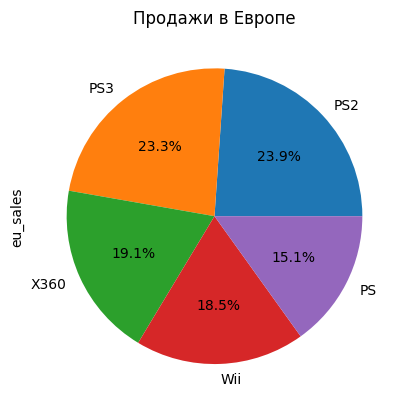

In [127]:
top5_platform_eu.plot(kind='pie', title='Продажи в Европе', autopct='%1.1f%%')

In [128]:
top5_platform_jp = df.query('jp_sales > 0').groupby('platform').sum()['jp_sales'].sort_values(ascending=False).head(5)
top5_platform_jp

platform
DS      175.02
PS      139.78
PS2     137.74
SNES    116.55
3DS     100.64
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'Продажи в Японии'}, ylabel='jp_sales'>

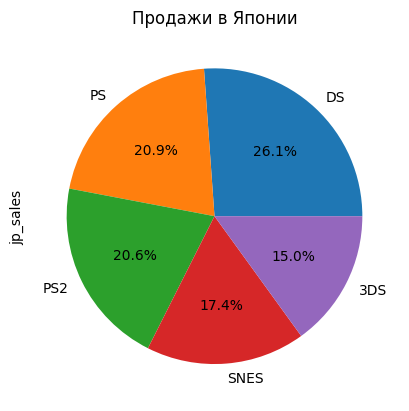

In [129]:
top5_platform_jp.plot(kind='pie', title='Продажи в Японии', autopct='%1.1f%%')

Порядок долей у всех почти одинаковые, различаются только сами платформы. В Японии набор популярных платформ явно отличается от тех еоторые в Северной Америке и в Европе. 

### Топ 5 жанров

In [132]:
top5_genre_na = df.query('na_sales > 0').groupby('genre').sum()['na_sales'].sort_values(ascending=False).head(5)
top5_genre_na

genre
Action      873.70
Sports      683.69
Shooter     590.35
Platform    444.44
Misc        401.69
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Жанры в Северной Америке'}, ylabel='na_sales'>

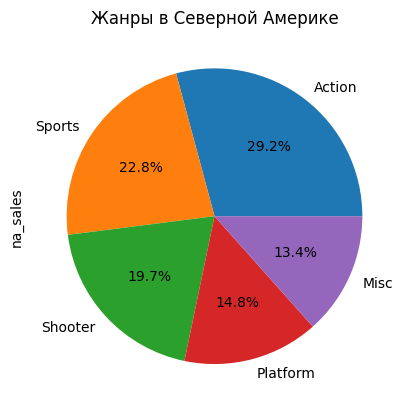

In [133]:
top5_genre_na.plot(kind='pie', title='Жанры в Северной Америке', autopct='%1.1f%%')

In [134]:
top5_genre_eu = df.query('eu_sales > 0').groupby('genre').sum()['eu_sales'].sort_values(ascending=False).head(5)
top5_genre_eu

genre
Action     517.58
Sports     376.46
Shooter    316.96
Racing     235.47
Misc       211.32
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'Жанры в Европе'}, ylabel='eu_sales'>

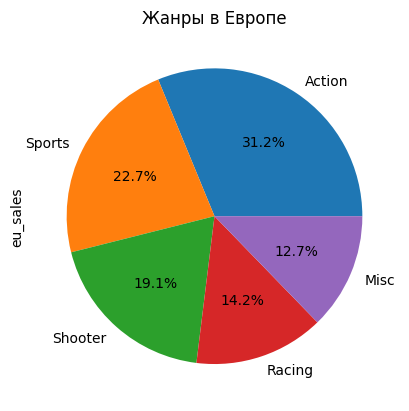

In [135]:
top5_genre_eu.plot(kind='pie', title='Жанры в Европе', autopct='%1.1f%%')

In [136]:
top5_genre_jp = df.query('jp_sales > 0').groupby('genre').sum()['jp_sales'].sort_values(ascending=False).head(5)
top5_genre_jp

genre
Role-Playing    353.88
Action          160.15
Sports          135.27
Platform        130.71
Misc            108.04
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'Жанры в Японии'}, ylabel='jp_sales'>

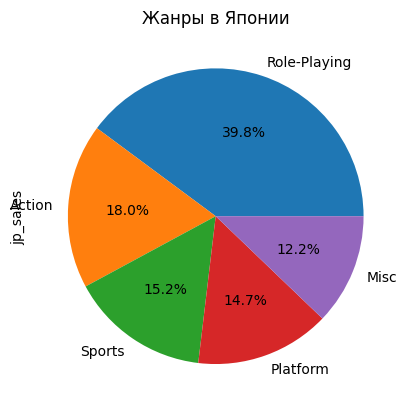

In [137]:
top5_genre_jp.plot(kind='pie', title='Жанры в Японии', autopct='%1.1f%%')

Европа и Северная Америка практически идентичны в своих предпочтениях даже в долях, а вот рынок Японии явным образом предпочитает один из жанров, которого даже нету в топ 5 других частей света и это сильно отличает их предпочтения. Удивительно, но в топ 5 жанров Японии не вошел жанр "шутер" это один из самых популярных жанров в Европе и Америке.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [138]:
reiting_na = df.query('na_sales > 0 and rating != "N"').groupby('rating').sum()['na_sales'].sort_values(ascending=False)
reiting_na

rating
E       1344.71
T        774.37
M        767.06
E10+     364.15
EC         2.04
AO         1.26
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Доли игр с разным рейтингом в Северной Америке'}, ylabel='na_sales'>

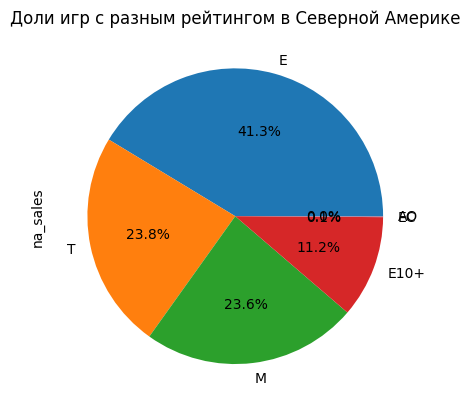

In [139]:
reiting_na.plot(kind='pie', title='Доли игр с разным рейтингом в Северной Америке', autopct='%1.1f%%')

In [140]:
reiting_eu = df.query('eu_sales > 0 and rating != "N"').groupby('rating').sum()['eu_sales'].sort_values(ascending=False)
reiting_eu

rating
E       735.88
M       501.18
T       438.84
E10+    195.01
AO        0.61
EC        0.11
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'Доли игр с разным рейтингом в Европе'}, ylabel='eu_sales'>

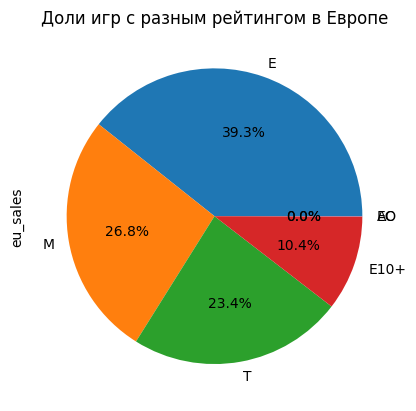

In [141]:
reiting_eu.plot(kind='pie', title='Доли игр с разным рейтингом в Европе', autopct='%1.1f%%')

In [142]:
reiting_jp = df.query('jp_sales > 0 and rating != "N"').groupby('rating').sum()['jp_sales'].sort_values(ascending=False)
reiting_jp

rating
E       213.30
T       159.61
M        67.79
E10+     51.44
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'Доли игр с разным рейтингом в Японии'}, ylabel='jp_sales'>

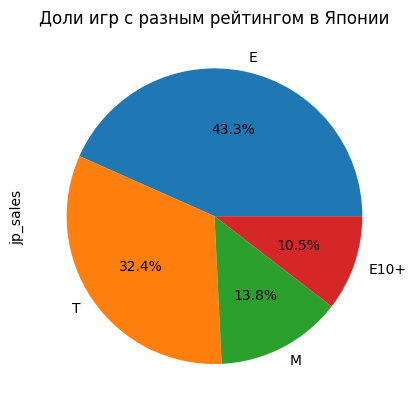

In [143]:
reiting_jp.plot(kind='pie', title='Доли игр с разным рейтингом в Японии', autopct='%1.1f%%')

В Европе и Северной Америке можно считать что не различаются доли, а вот Япония как и предполагалось отличилась, предпочтения смещены в сторону игр для более младшего возраста. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так и сформулируем нулевую гипотезу - средние пользовательские рейтинги платформ одинаковые, альтернативная ей средние не равны между собой. Критерий возьмем самый распространенный 5% и есть сомнения, что мы даже в него уложимся.

In [144]:
from scipy import stats as st
XOne = df.query('platform == "XOne" and user_score > -1')['user_score']
PC = df.query('platform == "PC" and user_score > -1')['user_score']

In [146]:
alpha = .05
users_platform_stats = st.ttest_ind(XOne, PC, equal_var=False)
print(users_platform_stats.pvalue)
alpha > users_platform_stats.pvalue

8.949496825998049e-05


True

Мы отвергаем нулевую гипотезу, что средние пользовательские рейтинги платформ одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза - средние пользовательские рейтинги жанров одинаковые, альтернативная ей средние не равны между собой. Критерий 5% самый распространенный. 

In [147]:
Action = df.query('genre == "Action" and user_score > -1')['user_score']
Sports = df.query('genre == "Sports" and user_score > -1')['user_score']

In [148]:
alpha = .05
users_genre_stats = st.ttest_ind(Action, Sports, equal_var=False)
print(users_genre_stats.pvalue)
alpha > users_genre_stats.pvalue

0.04413618565982231


True

Отвергаем нулевую гипотезу, но у меня есть подозрение, что я переборщил с предобработкой данных, есть такая "гипотеза" проверим ее.

# Вывод

Важной частью исследовательского анализа данных является определение сроков актуальности платформ, выяснили  что чем ближе к современности, тем дольше этот срок, еще заметно, что портативные платформы уходят, а на их место не появляется новых и с ними падают продажи игр жанра "платформер", скорее всего этот сегмент рынка занимают мобильные игры. Определили потенциально перспективные платформы(XOne, PS4, PC) и жанры(Shooter, Sports, Action) и увидели разницу в предпочтениях пользователе разных частей света. Отвергли гипотезу о равенстве средних рейтингов платформ Xbox One, PC и не отвергили гипотезу о равенстве средних оценок пользователей жанров.